In [1]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, timedelta
import time

In [2]:
app = Flask(__name__)

In [3]:
df = pd.read_csv("datasets/dataset4.csv")

In [4]:
print("\n-------------Sample-------------\n")
print(df.sample(10))
print("\n-------------Veriseti Bilgisi-------------\n")
print(df.info())
print("\n-------------Veriseti İstatistikleri-------------\n")
print(df.describe())
print("\n-------------Veriseti Boyutu-------------\n")
print(df.shape)
print("\n-------------Veriseti Boş Değer Sayısı-------------\n")
print(df.isnull().sum())


-------------Sample-------------

                                                 payload label
22568                calle nuestra seora del portal s/n,  norm
16978                                 gallego@cajucar.sn  norm
47221  SELECT * FROM stop WHERE diameter = 'was' FETC...  norm
60763                                        7.36777E+15  norm
49363                                           mckearne  norm
40829                                           6.59E+15  norm
45458  select   (  case when   (  9816  =  1693  )   ...  anom
2391                                           15821726a  norm
10700  1%")) or (select * from (select(sleep(5)))ydpu...  anom
9390                           koster.gracindo@webhut.sy  norm

-------------Veriseti Bilgisi-------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61682 entries, 0 to 61681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   payload  61682 non-null  object
 1   lab

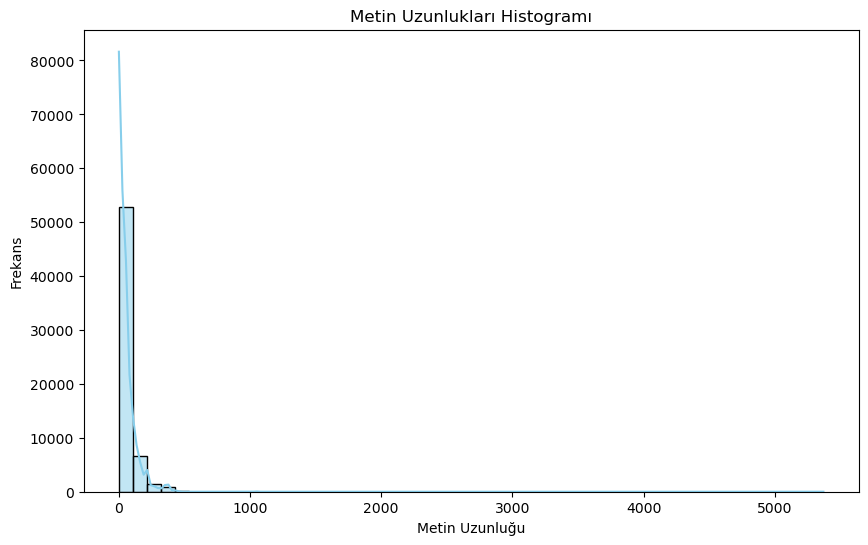

In [5]:
# Metin uzunluklarına ait histogram
df['text_length'] = df['payload'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Metin Uzunlukları Histogramı')
plt.xlabel('Metin Uzunluğu')
plt.ylabel('Frekans')
plt.show()


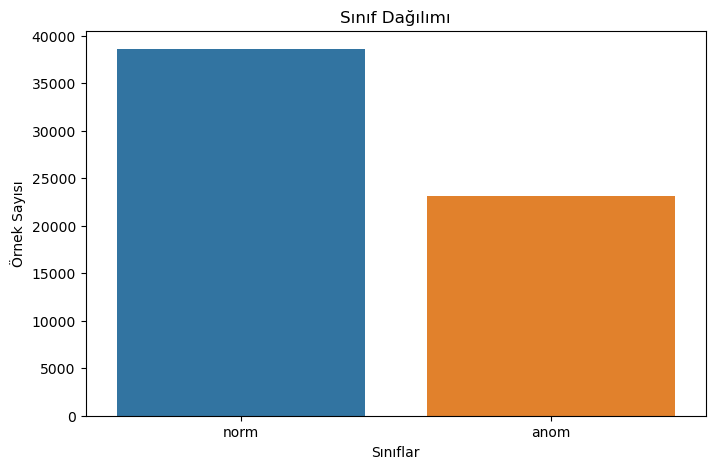

In [6]:
# Sınıf dağılımını gösteren bir çubuk grafiği
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')
plt.show()

In [7]:
print(df.head(50))

                                              payload label  text_length
0                                          benalmdena  norm           10
1   1%")) or updatexml(1808,concat(0x2e,0x7171706a...  anom          108
2                                  -4882' order by 1#  anom           18
3                  SELECT COUNT ( boneID ) FROM blank  norm           34
4                                         2.61522E+15  norm           11
5                                               50491  norm            5
6                                boom@paseotuperro.mo  norm           20
7   1' in boolean mode);select count(*) from sysib...  anom          110
8   select like  (  'abcdefg',upper  (  hex  (  ra...  anom          116
9   1"));begin dbms_lock.sleep(5); end and (("rqay...  anom           58
10  SELECT TOP 50 PERCENT * FROM stop SELECT * FRO...  norm          117
11             DELETE FROM rubber WHERE how = 'dirty'  norm           38
12                                              116

In [8]:
# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(df['payload'], df['label'], test_size=0.2, random_state=42)

In [9]:
# Modeli oluştur
start_time = time.time()
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1.fit(X_train, y_train)
end_time = time.time()
elapsed_time1 = end_time - start_time
print("\n-------------MultinomialNB Modeli-------------\n")
print("Eğitim süresi: ", elapsed_time1)
print("Eğitim verisi skoru: ", model1.score(X_train, y_train))


-------------MultinomialNB Modeli-------------

Eğitim süresi:  0.46687841415405273
Eğitim verisi skoru:  0.9912858445637855


In [10]:
start_time = time.time()
model2 = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
model2.fit(X_train, y_train)
end_time = time.time()
elapsed_time2 = end_time - start_time
print("\n-------------LogisticRegression Modeli-------------\n")
print("Eğitim süresi: ", elapsed_time2)
print("Eğitim verisi skoru: ", model2.score(X_train, y_train))


-------------LogisticRegression Modeli-------------

Eğitim süresi:  1.1601066589355469
Eğitim verisi skoru:  0.9813760259398115


In [11]:
start_time = time.time()
model3 = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))
model3.fit(X_train, y_train)
end_time = time.time()
elapsed_time3 = end_time - start_time
print("\n-------------SVC Modeli-------------\n")
print("Eğitim süresi: ", elapsed_time3)
print("Eğitim verisi skoru: ", model3.score(X_train, y_train))


-------------SVC Modeli-------------

Eğitim süresi:  96.01103281974792
Eğitim verisi skoru:  0.9971223021582734


In [12]:
start_time = time.time()
model4 = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model4.fit(X_train, y_train)
end_time = time.time()
elapsed_time4 = end_time - start_time
print("\n-------------RandomForestClassifier Modeli-------------\n")
print("Eğitim süresi: ", elapsed_time4)
print("Eğitim verisi skoru: ", model4.score(X_train, y_train))


-------------RandomForestClassifier Modeli-------------

Eğitim süresi:  82.59398174285889
Eğitim verisi skoru:  0.9996554868781031


In [13]:
# Test seti üzerinde modeli değerlendir
start_time = time.time()
y_pred1 = model1.predict(X_test)
end_time = time.time()
predict_elapsed_time1 = end_time - start_time
print("\n-------------Test Seti Üzerinden MultinomialNB Model Değerlendirmesi-------------\n")
print(metrics.classification_report(y_test, y_pred1))
print("Tahmin süresi: ", predict_elapsed_time1)


-------------Test Seti Üzerinden MultinomialNB Model Değerlendirmesi-------------

              precision    recall  f1-score   support

        anom       0.97      0.98      0.97      4658
        norm       0.98      0.98      0.98      7679

    accuracy                           0.98     12337
   macro avg       0.98      0.98      0.98     12337
weighted avg       0.98      0.98      0.98     12337

Tahmin süresi:  0.09219527244567871


In [14]:
# Test seti üzerinde modeli değerlendir
start_time = time.time()
y_pred2 = model2.predict(X_test)
end_time = time.time()
predict_elapsed_time2 = end_time - start_time
print("\n-------------Test Seti Üzerinden LogisticRegression Model Değerlendirmesi-------------\n")
print(metrics.classification_report(y_test, y_pred2))
print("Tahmin süresi: ", predict_elapsed_time2)


-------------Test Seti Üzerinden LogisticRegression Model Değerlendirmesi-------------

              precision    recall  f1-score   support

        anom       0.99      0.93      0.96      4658
        norm       0.96      0.99      0.98      7679

    accuracy                           0.97     12337
   macro avg       0.97      0.96      0.97     12337
weighted avg       0.97      0.97      0.97     12337

Tahmin süresi:  0.0883646011352539


In [15]:
# Test seti üzerinde modeli değerlendir
start_time = time.time()
y_pred3 = model3.predict(X_test)
end_time = time.time()
predict_elapsed_time3 = end_time - start_time
print("\n-------------Test Seti Üzerinden SVC Model Değerlendirmesi-------------\n")
print(metrics.classification_report(y_test, y_pred3))
print("Tahmin süresi: ", predict_elapsed_time3)


-------------Test Seti Üzerinden SVC Model Değerlendirmesi-------------

              precision    recall  f1-score   support

        anom       0.99      0.99      0.99      4658
        norm       0.99      0.99      0.99      7679

    accuracy                           0.99     12337
   macro avg       0.99      0.99      0.99     12337
weighted avg       0.99      0.99      0.99     12337

Tahmin süresi:  3.6381471157073975


In [16]:
# Test seti üzerinde modeli değerlendir
start_time = time.time()
y_pred4 = model4.predict(X_test)
end_time = time.time()
predict_elapsed_time4 = end_time - start_time
print("\n-------------Test Seti Üzerinden RandomForestClassifier Model Değerlendirmesi-------------\n")
print(metrics.classification_report(y_test, y_pred4))
print("Tahmin süresi: ", predict_elapsed_time4)


-------------Test Seti Üzerinden RandomForestClassifier Model Değerlendirmesi-------------

              precision    recall  f1-score   support

        anom       0.72      1.00      0.83      4658
        norm       1.00      0.76      0.86      7679

    accuracy                           0.85     12337
   macro avg       0.86      0.88      0.85     12337
weighted avg       0.89      0.85      0.85     12337

Tahmin süresi:  10.110578775405884


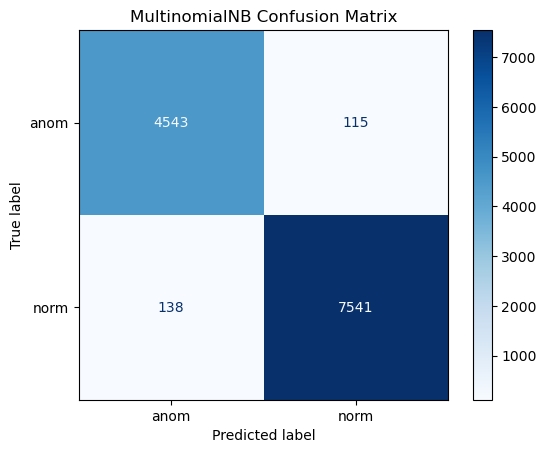

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('MultinomialNB Confusion Matrix')
plt.show()

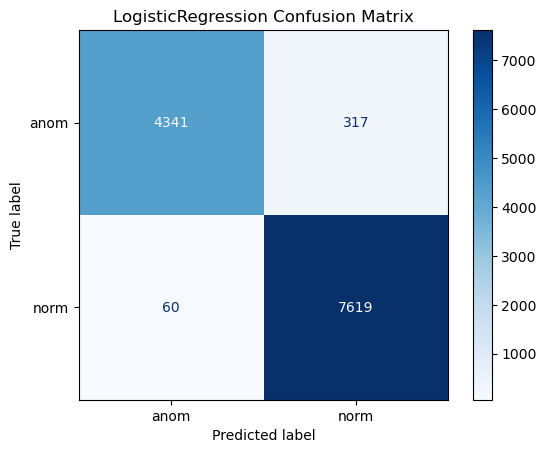

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('LogisticRegression Confusion Matrix')
plt.show()

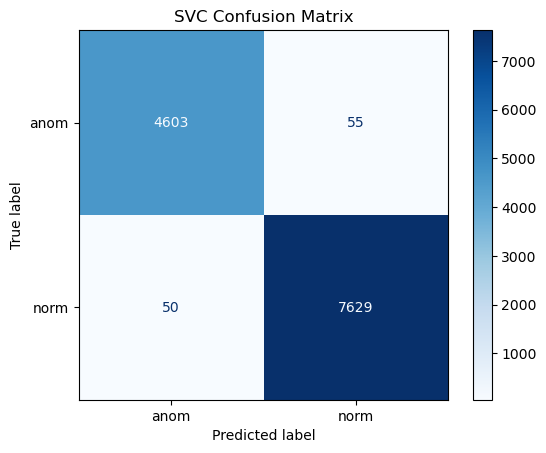

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVC Confusion Matrix')
plt.show()

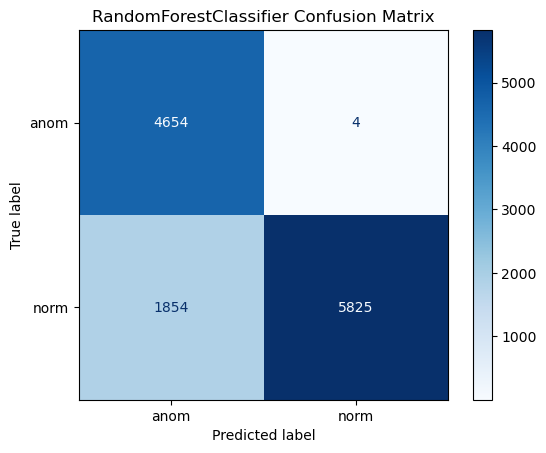

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred4, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model4.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

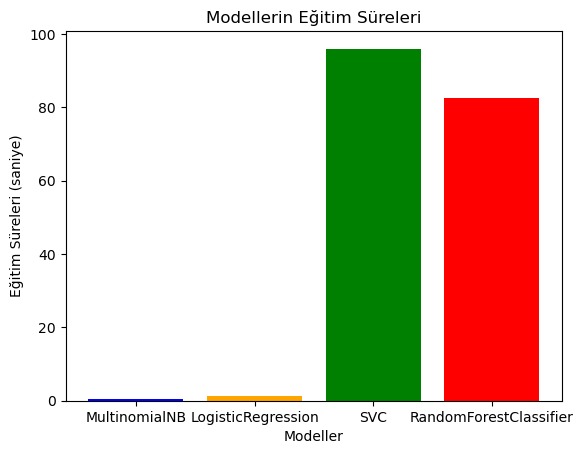

In [21]:
# Dört modelin eğitim süreleri (örnek veri)
model_names = ["MultinomialNB", "LogisticRegression", "SVC", "RandomForestClassifier"]
training_times = [elapsed_time1, elapsed_time2, elapsed_time3, elapsed_time4]  # Bu süreler sizin elinizdeki verilere göre olmalı

# Eğitim sürelerini görselleştir
plt.bar(model_names, training_times, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modeller')
plt.ylabel('Eğitim Süreleri (saniye)')
plt.title('Modellerin Eğitim Süreleri')
plt.show()

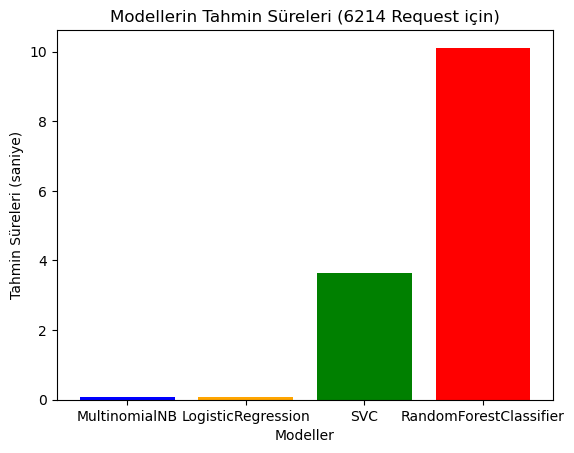

In [22]:
# Dört modelin tahmin süreleri (örnek veri)
model_names = ["MultinomialNB", "LogisticRegression", "SVC", "RandomForestClassifier"]
training_times = [predict_elapsed_time1, predict_elapsed_time2, predict_elapsed_time3, predict_elapsed_time4]  # Bu süreler sizin elinizdeki verilere göre olmalı

# Eğitim sürelerini görselleştir
plt.bar(model_names, training_times, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modeller')
plt.ylabel('Tahmin Süreleri (saniye)')
plt.title('Modellerin Tahmin Süreleri (6214 Request için)')
plt.show()

In [23]:
# Gerçek zamanlı analiz için endpoint
@app.route('/analyze_request1', methods=['POST'])
def analyze_request1():
    # Gelen isteği al
    client_ip = request.remote_addr
    request_text = request.get_data(as_text=True)

    # Modeli kullanarak analiz yap
    prediction = model1.predict([request_text])
    is_malicious = prediction[0] == 'anom'

    # Uyarı veya bilgi mesajını döndür
    if is_malicious:
        return jsonify({'message': 'Uyari: Potansiyel guvenlik tehdidi tespit edildi!', 'ip': client_ip})
    else:
        return jsonify({'message': 'Normal istek: Guvenli.', 'ip': client_ip})

In [24]:
# Gerçek zamanlı analiz için endpoint
@app.route('/analyze_request2', methods=['POST'])
def analyze_request2():
    # Gelen isteği al
    client_ip = request.remote_addr
    request_text = request.get_data(as_text=True)

    # Modeli kullanarak analiz yap
    prediction = model2.predict([request_text])
    is_malicious = prediction[0] == 'anom'

    # Uyarı veya bilgi mesajını döndür
    if is_malicious:
        return jsonify({'message': 'Uyari: Potansiyel guvenlik tehdidi tespit edildi!', 'ip': client_ip})
    else:
        return jsonify({'message': 'Normal istek: Guvenli.', 'ip': client_ip})

In [25]:
# Gerçek zamanlı analiz için endpoint
@app.route('/analyze_request3', methods=['POST'])
def analyze_request3():
    # Gelen isteği al
    client_ip = request.remote_addr
    request_text = request.get_data(as_text=True)

    # Modeli kullanarak analiz yap
    prediction = model3.predict([request_text])
    is_malicious = prediction[0] == 'anom'

    # Uyarı veya bilgi mesajını döndür
    if is_malicious:
        return jsonify({'message': 'Uyari: Potansiyel guvenlik tehdidi tespit edildi!', 'ip': client_ip})
    else:
        return jsonify({'message': 'Normal istek: Guvenli.', 'ip': client_ip})

In [26]:
# Gerçek zamanlı analiz için endpoint
@app.route('/analyze_request4', methods=['POST'])
def analyze_request4():
    # Gelen isteği al
    client_ip = request.remote_addr
    request_text = request.get_data(as_text=True)

    # Modeli kullanarak analiz yap
    prediction = model4.predict([request_text])
    is_malicious = prediction[0] == 'anom'

    # Uyarı veya bilgi mesajını döndür
    if is_malicious:
        return jsonify({'message': 'Uyari: Potansiyel guvenlik tehdidi tespit edildi!', 'ip': client_ip})
    else:
        return jsonify({'message': 'Normal istek: Guvenli.', 'ip': client_ip})

In [27]:
# Web sunucuyu başlatma
if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [29]:
### Test için curl komutları
# curl -X POST http://localhost:5000/analyze_request1 -d "SELECT * FROM users WHERE id = 1"
# curl -X POST http://localhost:5000/analyze_request1 -d "SELECT * FROM users WHERE id = 1 OR 1=1"
# curl -X POST http://localhost:5000/analyze_request1 -d "SELECT * FROM users WHERE id = 1; DROP TABLE users"
# curl -X POST http://localhost:5000/analyze_request1 -d "hasan@hotmail.com"